In [1]:
#imports
import csv
import aligner_ultra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict as Ord

#magic
%matplotlib inline
%load_ext autoreload

In [2]:
#import tab sep values file
df = pd.read_csv('All_WT_for_coopfit_tsv.csv', sep='\t')

#put saturation data column headers into list
colist = df.columns.tolist()[1:]

#create list of dataframes for each [lig]-sat data set for each receptor conc. and ensure sort oder (to avoid potting issues)
dflist = [df[['[egf]', i]].dropna().sort_values(by='[egf]') for i in colist]

#make headers uniform 
colist_low = [colist[i].lower() for i in range(len(colist))]

#apply uniform headers to dataframe
dflist_low = [dflist[i].rename(columns={colist[i]:colist_low[i]}) for i in range(len(colist_low))]

#import total receptor concentrations
with open('rtotswt.csv', 'r') as f:
    g = csv.reader(f)
    rtots = (list(g))
    
#convert to numerical values (floats)
rtots = [float(rtots[i][0]) for i in range(len(rtots))]

EGFR_WT_RTOTS_ord = Ord(zip(colist_low,rtots))

EGFR_WT_DICT_ord = Ord(zip(colist_low,dflist_low))

keylist = list(EGFR_WT_DICT_ord.keys())

keyed_sats = np.array([EGFR_WT_DICT_ord[key][key].as_matrix() for key in keylist])

keyed_ligs = np.array([EGFR_WT_DICT_ord[key]['[egf]'].as_matrix() for key in keylist])

keyed_rtots = np.array([EGFR_WT_RTOTS_ord[key] for key in keylist])

In [3]:
old_aligned_ligs = aligner_old.align_datset(keyed_ligs)

In [5]:
new_aligned_ligs = aligner_new.align_datset(keyed_ligs)

NameError: name 'aligner_wrap' is not defined

In [6]:
%autoreload

In [7]:
new_aligned_ligs = aligner_new.align_datset(keyed_ligs)

IndexError: index 15 is out of bounds for axis 0 with size 15

In [8]:
%autoreload

In [11]:
aligner_new.align_datset(keyed_ligs)

Hi Mike
Hi Mike
Hi Mike
Hi Mike
Hi Mike


IndexError: index 15 is out of bounds for axis 0 with size 15

In [10]:
import aligner_ultra

In [13]:
ultra_aligned_ligs = aligner_ultra.align_datset(keyed_ligs)

In [19]:
ultra_avg = np.nanmean(ultra_aligned_ligs, axis=0)

In [18]:
old_avg = np.nanmean(old_aligned_ligs, axis=0)

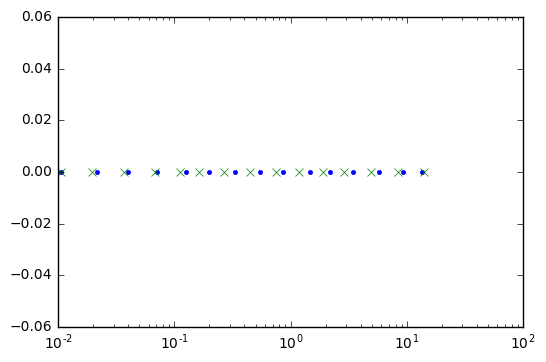

In [22]:
plt.semilogx(ultra_avg, ultra_avg*0,'.')
plt.semilogx(old_avg,old_avg*0,'x')

In [25]:
ultra_space = [ultra_avg[i+1]/ultra_avg[i] for i in range(len(ultra_avg)-1)]

In [26]:
old_space = [old_avg[i+1]/old_avg[i] for i in range(len(old_avg)-1)]

In [35]:
np.std(ultra_space)/np.average(ultra_space)

0.084016679045056469

In [34]:
np.average(old_space)

1.6735367668501531

In [44]:
a = [np.where(np.isnan(i)==False)[0] for i in ultra_aligned_ligs]

In [48]:
ultra_aligned_ligs

array([[  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
          6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
          2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
          1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
          4.19711500e+00,   8.12129800e+00,   1.60132400e+01],
       [  8.43507800e-03,   1.63246100e-02,   3.21927400e-02,
          6.58995300e-02,   9.78926700e-02,   1.49518100e-01,
          2.53313200e-01,   3.97988100e-01,   6.93842500e-01,
                     nan,   1.83115500e+00,   2.57004900e+00,
          5.06802900e+00,   8.19680900e+00,              nan],
       [  1.04782800e-02,   4.39510000e-02,   6.71754600e-02,
                     nan,   1.59764000e-01,   2.75784200e-01,
          4.67317900e-01,   8.37884700e-01,   1.34129100e+00,
          2.29507100e+00,   3.22207200e+00,   5.06843800e+00,
          9.99232400e+00,   1.63226300e+01,              nan],
       [             nan,   2.10589600e-02,   4.39474400e-02,
     

In [57]:
religs = np.array([ultra_avg[a[i]] for i in range(len(ultra_aligned_ligs))])

In [58]:
religs.shape

(17,)

In [59]:
for i in religs:
    print(i.size)

15
13
13
13
12
15
14
15
15
14
14
15
13
14
15
14
15


In [60]:
for i in keyed_ligs:
    print(i.size)

15
13
13
13
12
15
14
15
15
14
14
15
13
14
15
14
15


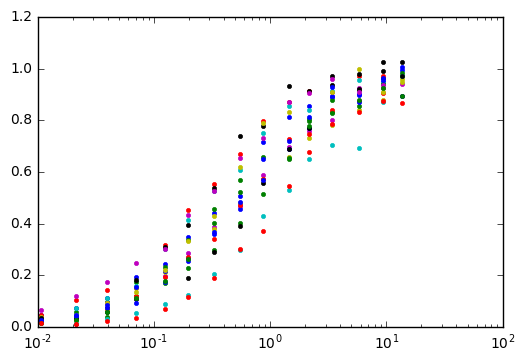

In [61]:
for i in range(len(religs)):
    plt.semilogx(religs[i],keyed_sats[i],'.')

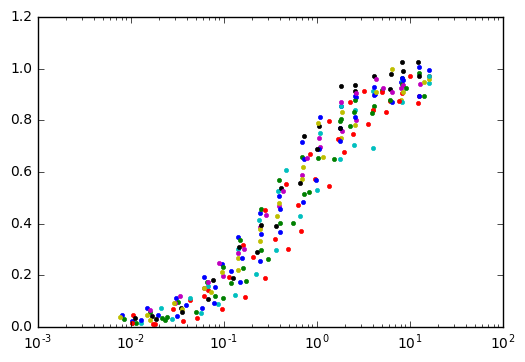

In [62]:
for i in range(len(keyed_ligs)):
    plt.semilogx(keyed_ligs[i],keyed_sats[i],'.')

In [1]:
np.std([np.average([i[j+1]/i[j] for j in range(len(i)-1)]) for i in keyed_ligs])   

NameError: name 'np' is not defined

In [73]:
1.7**15

2862.4230515098147

In [75]:
1.6**15

1152.921504606848

In [76]:
1/1.7

0.5882352941176471

In [77]:
1/1.6

0.625

In [78]:
1/6

0.16666666666666666

In [79]:
1/8

0.125

In [80]:
5/8

0.625

In [81]:
5/9

0.5555555555555556

In [82]:
6/11

0.5454545454545454

In [83]:
7/12

0.5833333333333334